In [21]:
import pandas as pd

# Carregar o arquivo CSV do dataset em um DataFrame pandas
dataset = pd.read_csv('diabetes_prediction_dataset.csv')

In [22]:
# Visualizar as primeiras linhas do DataFrame para entender a estrutura dos dados
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [23]:
# Definir a variável alvo (o que queremos prever)
y = dataset['diabetes']

# Definir as variáveis preditoras (características que serão usadas para prever o alvo)
# Remove a coluna 'diabetes' do dataset para criar o conjunto de features
x = dataset.drop('diabetes', axis=1)

# Contar a frequência de cada valor na variável alvo 'diabetes'
# Isso mostra o quão desbalanceado está o dataset em relação à classe diabetes (0 ou 1)
print(dataset['diabetes'].value_counts())

diabetes
0    91500
1     8500
Name: count, dtype: int64


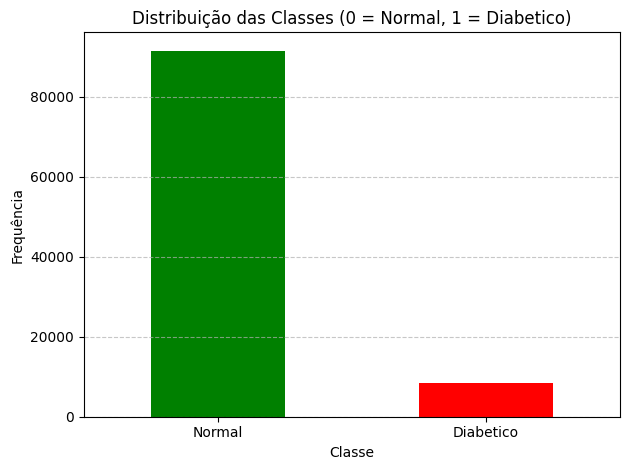

In [24]:
import matplotlib.pyplot as plt

# Criar um gráfico de barras para visualizar a distribuição das classes (Normal vs Diabético)
dataset['diabetes'].value_counts().plot(kind='bar', color=['green', 'red'])

# Adicionar título e rótulos aos eixos do gráfico
plt.title('Distribuição das Classes (0 = Normal, 1 = Diabetico)')
plt.xlabel('Classe')
plt.ylabel('Frequência')

# Definir os rótulos do eixo x para serem mais descritivos
plt.xticks([0, 1], ['Normal', 'Diabetico'], rotation=0)

# Adicionar linhas de grade ao eixo y para facilitar a leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar o layout para evitar que os rótulos se sobreponham
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [25]:
# Remover linhas onde o valor na coluna 'diabetes' é nulo (NaN)
# Embora o value_counts anterior tenha mostrado que não há NaNs em 'diabetes',
# esta linha garante que, se houvesse, elas seriam removidas.
df = dataset.dropna(subset=['diabetes'])

In [26]:
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

# Selecionar features (variáveis preditoras) e target (variável alvo) novamente,
# garantindo que o dataset original 'dataset' seja usado.
X = dataset.drop(columns='diabetes')
y = dataset['diabetes']

# Aplicar One-Hot Encoding nas colunas categóricas ('gender', 'smoking_history')
# Isso transforma variáveis categóricas em um formato numérico que os modelos podem entender.
# drop_first=True remove a primeira categoria de cada coluna para evitar multicolinearidade.
X = pd.get_dummies(X, columns=['gender', 'smoking_history'], drop_first=True)

# Inicializar o SMOTE (Synthetic Minority Over-sampling Technique)
# O SMOTE é usado para lidar com datasets desbalanceados, criando amostras sintéticas da classe minoritária.
smote = SMOTE(random_state=42)

# Aplicar SMOTE aos dados (neste caso, ao conjunto completo antes da divisão treino/teste)
# Isso irá aumentar o número de exemplos da classe minoritária (diabéticos) para balancear com a majoritária (não diabéticos).
X_resampled, y_resampled = smote.fit_resample(X, y)

# Imprimir a contagem de valores na variável alvo após a aplicação do SMOTE
# Isso confirma que as classes agora estão balanceadas.
print(pd.Series(y_resampled).value_counts())

diabetes
0    91500
1    91500
Name: count, dtype: int64


In [27]:
from sklearn.model_selection import train_test_split

# Dividir o dataset em conjuntos de treino e teste
# X: variáveis preditoras, y: variável alvo
# test_size=0.3: 30% dos dados serão usados para teste, 70% para treino
# random_state=42: Garante que a divisão seja a mesma sempre que o código for executado
# stratify=y: Garante que a proporção das classes na variável alvo (y) seja a mesma nos conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Imprimir a distribuição das classes nos conjuntos de treino e teste para verificar a estratificação
print("Treino:")
print(y_train.value_counts(normalize=True))
print("\nTeste:")
print(y_test.value_counts(normalize=True))

Treino:
diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64

Teste:
diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64


In [28]:
# Importar a função train_test_split novamente (já importada na célula anterior)
from sklearn.model_selection import train_test_split

In [29]:
# Dividir o dataset em conjuntos de treino e teste novamente (já feito na célula c7133eb4)
# Esta célula parece redundante e pode ser removida ou integrada à célula anterior.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [30]:
from imblearn.over_sampling import SMOTE

# Inicializar o SMOTE (já inicializado anteriormente na célula ywhQu4uRhgVG)
# Esta célula inicializa o SMOTE novamente, o que é aceitável se você quiser
# aplicar SMOTE apenas no conjunto de treino, como é a prática comum.
smote = SMOTE(random_state=42)

# Aplicar SMOTE apenas no conjunto de treino (X_train, y_train)
# Isso é crucial para evitar vazamento de dados do conjunto de teste para o treino.
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [31]:
# Modelo 1: Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Inicializar o modelo Random Forest
# random_state=42 garante reprodutibilidade dos resultados
rf = RandomForestClassifier(random_state=42)

# Treinar o modelo Random Forest com os dados de treino reamostrados pelo SMOTE
rf.fit(X_train_resampled, y_train_resampled)

# Fazer previsões no conjunto de teste (não reamostrado)
y_pred_rf = rf.predict(X_test)

# Avaliar o desempenho do modelo Random Forest
print("Random Forest")
# Imprimir a matriz de confusão: mostra o número de previsões corretas e incorretas para cada classe
print(confusion_matrix(y_test, y_pred_rf))
# Imprimir o relatório de classificação: inclui precisão, recall, f1-score e suporte para cada classe
print(classification_report(y_test, y_pred_rf, digits=4))

Random Forest
[[26962   488]
 [  676  1874]]
              precision    recall  f1-score   support

           0     0.9755    0.9822    0.9789     27450
           1     0.7934    0.7349    0.7630      2550

    accuracy                         0.9612     30000
   macro avg     0.8845    0.8586    0.8709     30000
weighted avg     0.9601    0.9612    0.9605     30000



In [32]:
# Modelo 2: Regressão Logística

from sklearn.linear_model import LogisticRegression

# Inicializar o modelo de Regressão Logística
# max_iter=1000 aumenta o número máximo de iterações para o algoritmo convergir
lr = LogisticRegression(max_iter=1000)

# Treinar o modelo de Regressão Logística com os dados de treino reamostrados pelo SMOTE
lr.fit(X_train_resampled, y_train_resampled)

# Fazer previsões no conjunto de teste (não reamostrado)
y_pred_lr = lr.predict(X_test)

# Avaliar o desempenho do modelo de Regressão Logística
print("Logistic Regression")
# Imprimir a matriz de confusão
print(confusion_matrix(y_test, y_pred_lr))
# Imprimir o relatório de classificação
print(classification_report(y_test, y_pred_lr, digits=4))

Logistic Regression
[[25222  2228]
 [  477  2073]]
              precision    recall  f1-score   support

           0     0.9814    0.9188    0.9491     27450
           1     0.4820    0.8129    0.6052      2550

    accuracy                         0.9098     30000
   macro avg     0.7317    0.8659    0.7771     30000
weighted avg     0.9390    0.9098    0.9199     30000



In [33]:
from sklearn.metrics import accuracy_score

# Calcular a acurácia para o modelo Random Forest
acc_rf = accuracy_score(y_test, y_pred_rf)
# Calcular a acurácia para o modelo de Regressão Logística
acc_lr = accuracy_score(y_test, y_pred_lr)

# Imprimir as acurácias arredondadas para 4 casas decimais
print(f"Acurácia - Random Forest: {acc_rf:.4f}")
print(f"Acurácia - Regressão Logística: {acc_lr:.4f}")

Acurácia - Random Forest: 0.9612
Acurácia - Regressão Logística: 0.9098


In [ ]:
import numpy as np

# Listas para armazenar as acurácias de cada modelo em cada iteração
acc_rf_list = []
acc_lr_list = []

# Loop para repetir o processo de treino e avaliação 30 vezes com seeds diferentes
for seed in range(30):
  # 1. Dividir o dataset em treino e teste com uma nova seed a cada iteração
  X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.3, stratify=y, random_state=seed
  )

  # 2. Aplicar SMOTE apenas no conjunto de treino com a mesma seed da divisão
  smote = SMOTE(random_state=seed)
  X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

  # 3. Treinar e avaliar o modelo Random Forest
  rf = RandomForestClassifier(random_state=seed)
  rf.fit(X_train_resampled, y_train_resampled)
  y_pred_rf = rf.predict(X_test)
  # Adicionar a acurácia à lista
  acc_rf_list.append(accuracy_score(y_test, y_pred_rf))

  # 4. Treinar e avaliar o modelo de Regressão Logística
  lr = LogisticRegression(max_iter=1000)
  lr.fit(X_train_resampled, y_train_resampled)
  y_pred_lr = lr.predict(X_test)
  # Adicionar a acurácia à lista
  acc_lr_list.append(accuracy_score(y_test, y_pred_lr))

# 5. Calcular estatísticas (média e desvio padrão) das acurácias obtidas nas 30 iterações
mean_rf = np.mean(acc_rf_list)
std_rf = np.std(acc_rf_list)

mean_lr = np.mean(acc_lr_list)
std_lr = np.std(acc_lr_list)

# Imprimir as estatísticas
print("Random Forest - Média da acurácia:", round(mean_rf, 4), "| Desvio padrão:", round(std_rf, 4))
print("Logistic Regression - Média da acurácia:", round(mean_lr, 4), "| Desvio padrão:", round(std_lr, 4))

In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Selecionar a variável alvo novamente
y = dataset['diabetes']

# Verifica e remove linhas com valor NaN na variável alvo 'y'
# Isso garante que o conjunto de dados usado para o modelo não tenha valores faltantes na variável de destino.
nan_mask = y.isna()
X = X[~nan_mask]
y = y[~nan_mask]

# Dividir o dataset em conjuntos de treino e teste usando a seed 42 para reprodutibilidade
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Aplicar SMOTE apenas no conjunto de treino para balancear as classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Treinar o modelo final (Random Forest neste caso, pois teve melhor desempenho médio)
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train_resampled, y_train_resampled)

# Salvar o modelo treinado em um arquivo .pkl para uso posterior
with open("modelo_diabetes.pkl", "wb") as f:
    pickle.dump(best_model, f)

# Imprimir mensagem de confirmação
print("Modelo salvo com sucesso como 'modelo_diabetes.pkl'")

In [ ]:
# Instalar a biblioteca gradio para criar uma interface web para o modelo
# O "Requirement already satisfied" no output indica que a biblioteca já está instalada.
pip install gradio

In [ ]:
import gradio as gr
import pickle
import pandas as pd

# Carregar o modelo de diabetes treinado a partir do arquivo .pkl
with open("modelo_diabetes.pkl", "rb") as f:
    modelo = pickle.load(f)

# Definir a lista de colunas que o modelo espera como entrada
colunas_modelo = [
    'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
    'blood_glucose_level', 'gender_Male', 'gender_Other',
    'smoking_history_current', 'smoking_history_ever', 'smoking_history_former',
    'smoking_history_never', 'smoking_history_not current'
]

# Definir a função que será executada pelo Gradio para fazer a previsão
def prever_diabetes(genero, idade, hipertensao, doenca_cardiaca, tabagismo, imc, hba1c, glicemia):
    # Codifica a entrada 'genero' em variáveis dummy (One-Hot Encoding)
    gender_dummies = {
        'gender_Male': 0,
        'gender_Other': 0
    }
    if genero == "Masculino":
        gender_dummies['gender_Male'] = 1
    elif genero == "Outro":
        gender_dummies['gender_Other'] = 1
    # Se não é masculino nem outro, assume "Feminino" (gender_Male e gender_Other permanecem 0)

    # Codifica a entrada 'tabagismo' em variáveis dummy (One-Hot Encoding)
    smoking_dummies = {
        'smoking_history_current': 0,
        'smoking_history_ever': 0,
        'smoking_history_former': 0,
        'smoking_history_never': 0,
        'smoking_history_not current': 0
    }
    # Mapeia as opções do Gradio para os nomes das colunas esperadas pelo modelo
    mapa_tabagismo = {
        "Fumante atual": 'smoking_history_current',
        "Já fumou": 'smoking_history_ever',
        "Ex-fumante": 'smoking_history_former',
        "Nunca fumou": 'smoking_history_never',
        "Não é fumante atualmente": 'smoking_history_not current'
    }
    # Define a coluna dummy correspondente ao histórico de tabagismo fornecido
    if tabagismo in mapa_tabagismo:
        smoking_dummies[mapa_tabagismo[tabagismo]] = 1

    # Converte as entradas de sim/não para valores binários (0 ou 1)
    hipertensao_bin = 1 if hipertensao == "Sim" else 0
    doenca_cardiaca_bin = 1 if doenca_cardiaca == "Sim" else 0

    # Monta um dicionário com todos os dados de entrada no formato esperado pelo modelo
    dados_dict = {
        'age': idade,
        'hypertension': hipertensao_bin,
        'heart_disease': doenca_cardiaca_bin,
        'bmi': imc,
        'HbA1c_level': hba1c,
        'blood_glucose_level': glicemia,
        **gender_dummies, # Adiciona as dummies de gênero ao dicionário
        **smoking_dummies # Adiciona as dummies de tabagismo ao dicionário
    }

    # Cria um DataFrame pandas a partir do dicionário
    # Garante que as colunas estejam na ordem correta que o modelo foi treinado
    df = pd.DataFrame([dados_dict], columns=colunas_modelo)

    # Faz a predição usando o modelo carregado
    pred = modelo.predict(df)[0]

    # Retorna o resultado da predição em um formato legível
    return "🔴 DIABETES DETECTADA" if pred == 1 else "🟢 Normal"

# Cria a interface Gradio
interface = gr.Interface(
    fn=prever_diabetes, # Função a ser executada
    inputs=[ # Define os componentes de entrada da interface
        gr.Radio(["Feminino", "Masculino", "Outro"], label="Gênero", value="Feminino"), # Rádio button para Gênero
        gr.Number(label="Idade", value=0), # Campo numérico para Idade
        gr.Radio(["Não", "Sim"], label="Hipertensão", value="Não"), # Rádio button para Hipertensão
        gr.Radio(["Não", "Sim"], label="Doença Cardíaca", value="Não"), # Rádio button para Doença Cardíaca
        gr.Radio( # Rádio button para Histórico de Tabagismo
            [
                "Nunca fumou",
                "Ex-fumante",
                "Fumante atual",
                "Já fumou",
                "Não é fumante atualmente"
            ],
            label="Histórico de Tabagismo",
            value="Nunca fumou"
        ),
        gr.Number(label="IMC (Índice de Massa Corporal)", value=0), # Campo numérico para IMC
        gr.Number(label="Nível de HbA1c (%)", value=0), # Campo numérico para Nível de HbA1c
        gr.Number(label="Nível de Glicemia (mg/dL)", value=0) # Campo numérico para Nível de Glicemia
    ],
    outputs=gr.Textbox(label="Resultado da Predição"), # Define o componente de saída (um campo de texto)
    title="Previsor de Diabetes", # Título da interface
    description="Responda às perguntas abaixo para prever a chance de diabetes." # Descrição da interface
)

# Inicia a interface Gradio. O share=True é adicionado automaticamente no Colab.
interface.launch()